### Generate Data

In [1]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Generate good resolution figures
%config InlineBackend.figure_format = 'retina'

# Initialise random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)

# az = arviz 贝叶斯模型分析库
az.style.use("arviz-darkgrid")

In [3]:
# True parameter values
# alpha, true intercept; sigma, standard deviation (for the noise)
# beta, true coefficients (for the predictor variables)
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
# A standard deviation of 0.2 (less variable)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + rng.normal(size=size) * sigma

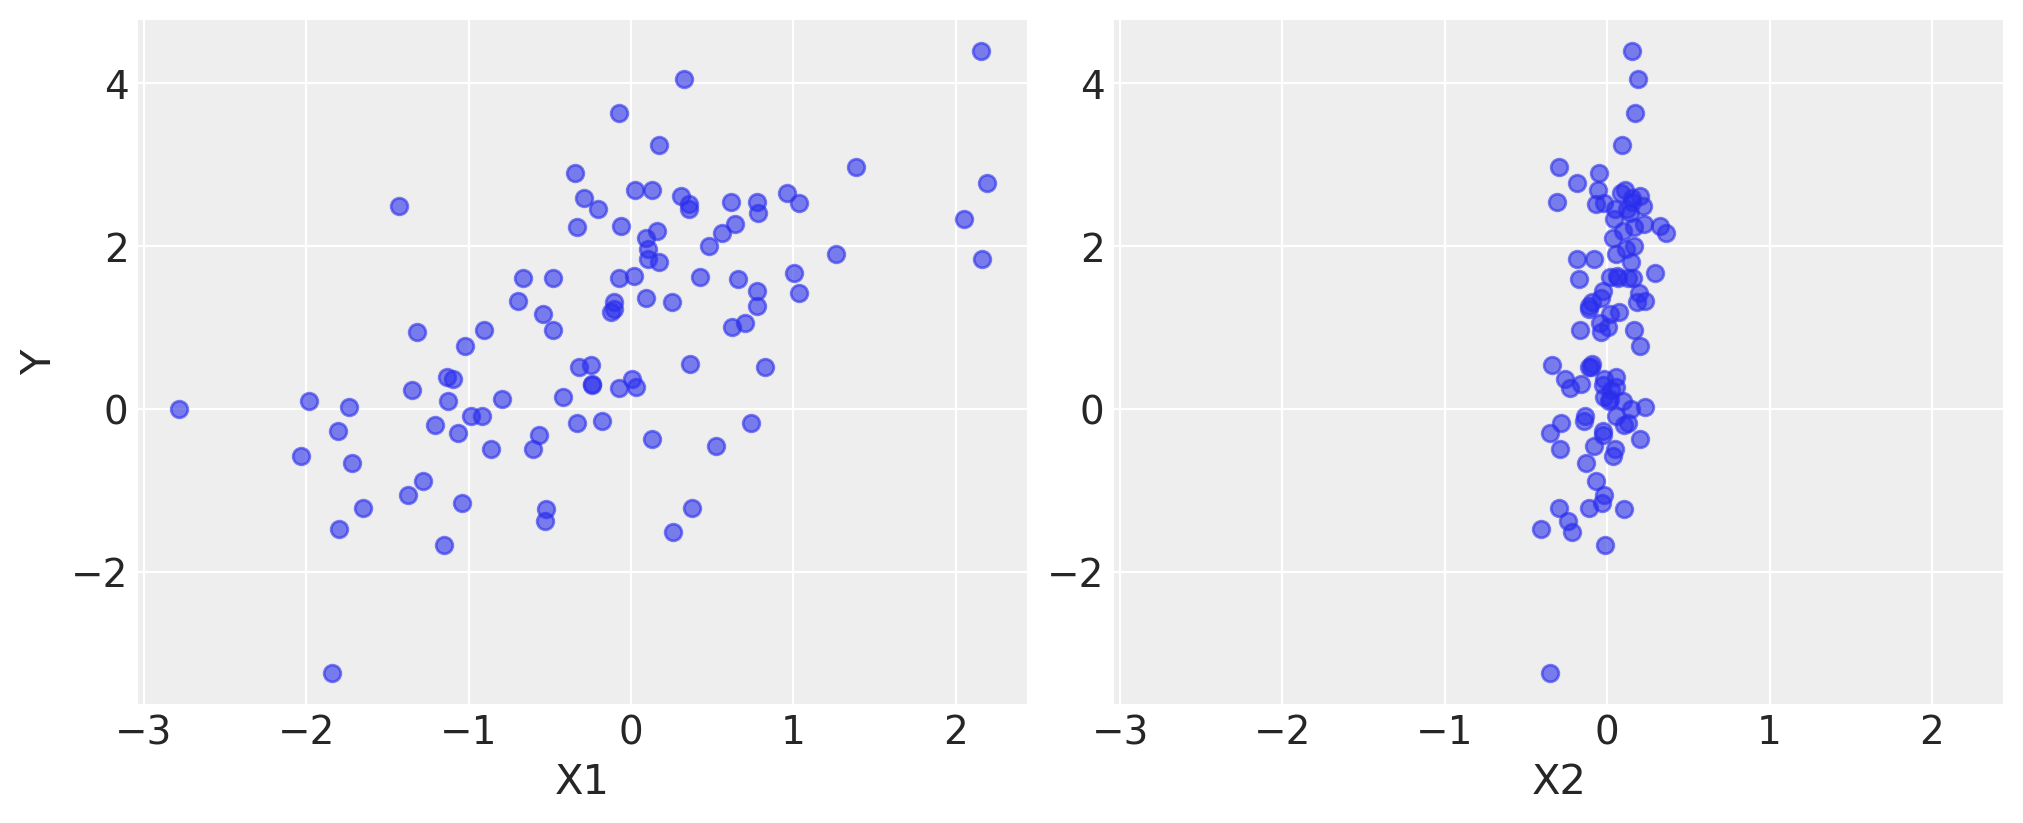

In [4]:
# Simulated data
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2");

### Model Specification

In [5]:
import pymc as pm
print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v5.12.0


In [6]:
# Build the PyMC model

# Creates a new Model object which is a container for the model random variables
basic_model = pm.Model()

# 
with basic_model:
    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

In [7]:
with basic_model:
    # draw 1000 posterior samples
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


In [8]:
# with basic_model:
#     # instantiate sampler
#     step = pm.Slice()

#     # draw 5000 posterior samples
#     slice_idata = pm.sample(5000, step=step)

In [9]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [10]:
idata.posterior["alpha"].sel(draw=slice(0, 4))

<xarray.DataArray 'alpha' (chain: 4, draw: 5)> Size: 160B
array([[1.04066929, 0.92171593, 1.14745768, 1.04410157, 1.29048858],
       [1.20418188, 1.20418188, 1.07088494, 1.17808112, 1.12391271],
       [1.28260987, 1.17310889, 1.17310889, 1.2259528 , 1.01019152],
       [1.10981794, 1.05052619, 1.17831449, 1.20030425, 1.09152579]])
Coordinates:
  * chain    (chain) int64 32B 0 1 2 3
  * draw     (draw) int64 40B 0 1 2 3 4

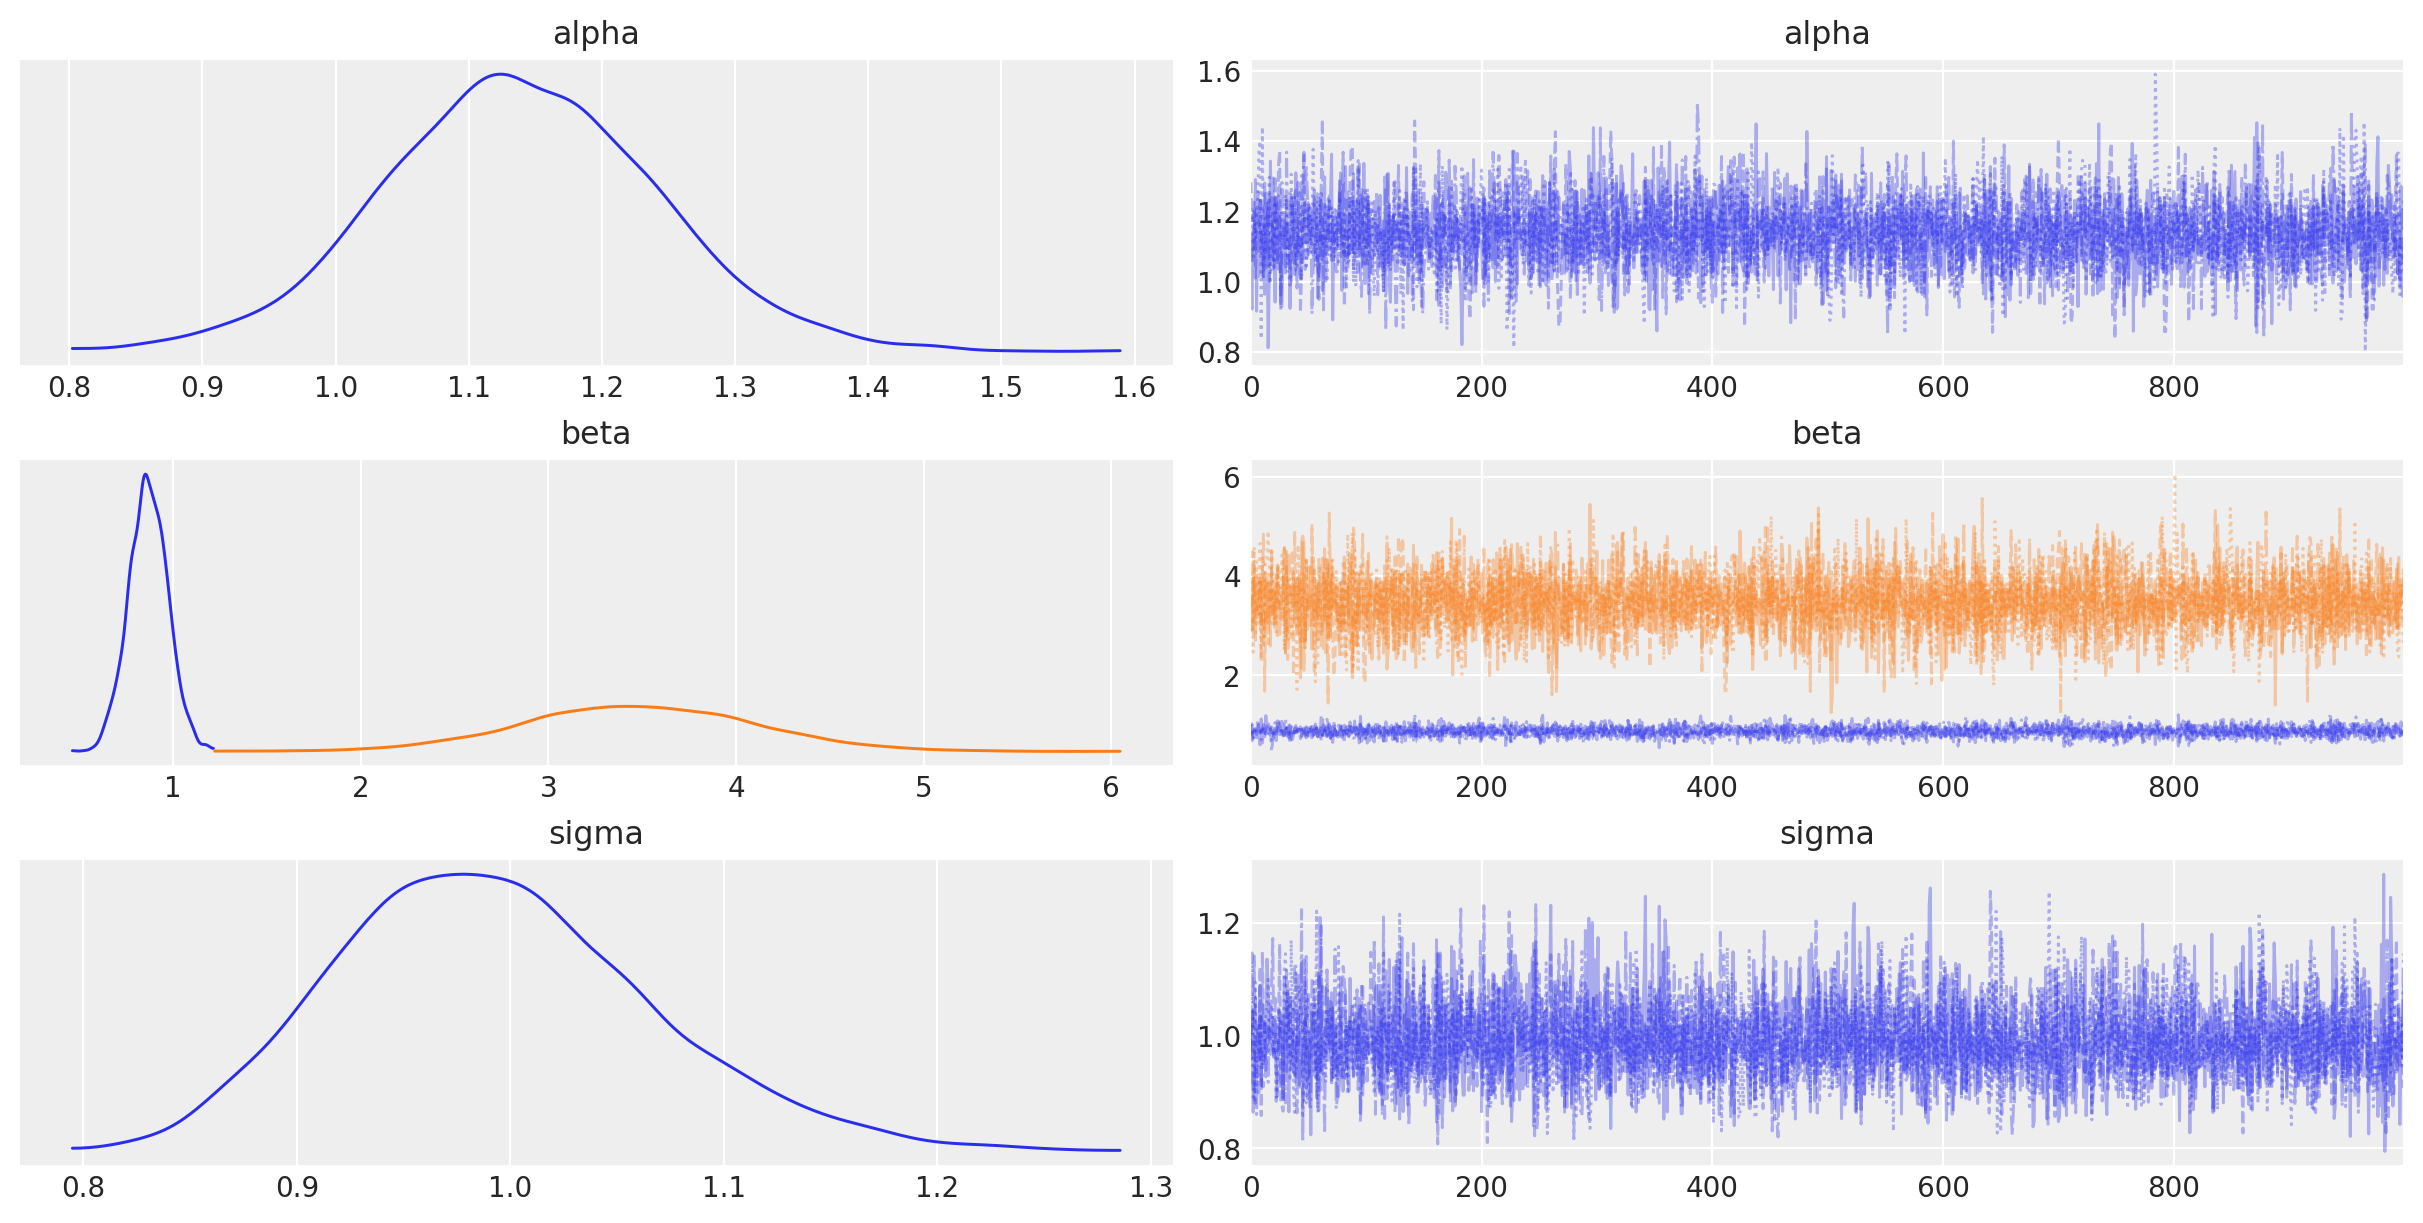

In [11]:
az.plot_trace(idata, combined=True);

In [12]:
az.summary(idata, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,1.14,0.10,0.95,1.33,0.00,0.00,5192.70,3104.63,1.0
beta[0],0.87,0.10,0.66,1.06,0.00,0.00,4981.67,3424.11,1.0
beta[1],3.48,0.61,2.38,4.68,0.01,0.01,5760.04,3268.61,1.0
sigma,0.99,0.07,0.86,1.13,0.00,0.00,5865.95,3378.88,1.0
